# Photometric Calibration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import(PowerNorm,LogNorm)
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import os
import scipy.ndimage as snd
from scipy import signal
import glob
import matplotlib.pyplot as plt

In [4]:
filt_name = 'B'

In [6]:
file_names = glob.glob('./Final_Data/Calibration/F66_%s*' % filt_name)
file_names

['./Final_Data/Calibration/F66_B_20_01.fits',
 './Final_Data/Calibration/F66_B_20_02.fits',
 './Final_Data/Calibration/F66_B_20_03.fits',
 './Final_Data/Calibration/F66_B_20_04.fits']

In [7]:
files = [fits.getdata(image) for image in file_names]

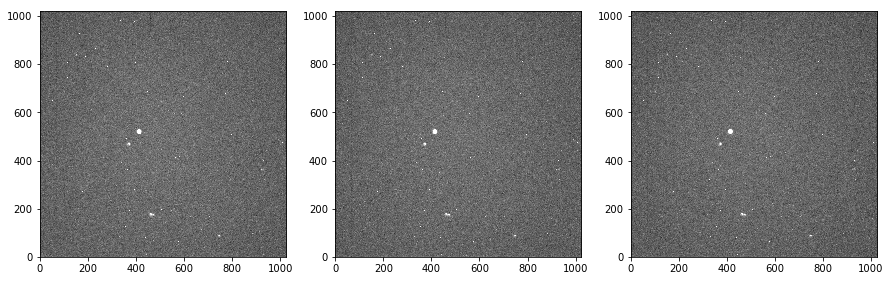

In [8]:
plt.figure(figsize=((15,15)))
plt.subplot(131)
plt.imshow(files[0], cmap='gray', origin='lower', vmin=np.median(files[0])-2*np.std(files[0]),
                    vmax=np.median(files[0])+3*np.std(files[0]))
plt.subplot(132)
plt.imshow(files[1], cmap='gray', origin='lower', vmin=np.median(files[0])-2*np.std(files[0]),
                    vmax=np.median(files[0])+3*np.std(files[0]))
plt.subplot(133)
plt.imshow(files[2], cmap='gray', origin='lower', vmin=np.median(files[0])-2*np.std(files[0]),
                    vmax=np.median(files[0])+3*np.std(files[0]))
plt.show()

In [11]:
dark = fits.getdata('./Output/Dark.fits')
bias = fits.getdata('./Output/Bias.fits')
flat_B = fits.getdata('./Output/Flats/B_flat.fits')
flat_R = fits.getdata('./Output/Flats/R_flat.fits')
flat_I = fits.getdata('./Output/Flats/I_flat.fits')
flat_V = fits.getdata('./Output/Flats/V_flat.fits')
flat_Ha = fits.getdata('./Output/Flats/Ha_flat.fits')

In [21]:
exp_time = fits.getheader(file_names[0])['EXPTIME']

reduced = (files-(dark-bias)*(exp_time/200)-bias)/((flat_B-bias)/np.median(flat_B-bias))

In [236]:
#reduced = (files-(dark-bias)*(20/200)-bias)

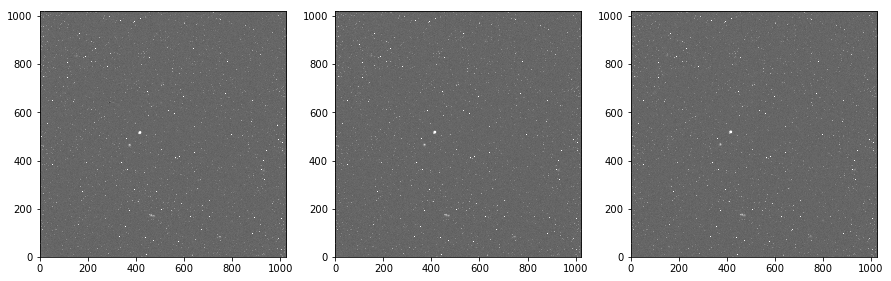

In [237]:
plt.figure(figsize=((15,15)))
plt.subplot(131)
plt.imshow(reduced[0], cmap='gray', origin='lower', vmin=np.median(reduced[0])-2*np.std(reduced[0]),
                    vmax=np.median(reduced[0])+3*np.std(reduced[0]))
plt.subplot(132)
plt.imshow(reduced[1], cmap='gray', origin='lower', vmin=np.median(reduced[0])-2*np.std(reduced[0]),
                    vmax=np.median(reduced[0])+3*np.std(reduced[0]))
plt.subplot(133)
plt.imshow(reduced[2], cmap='gray', origin='lower', vmin=np.median(reduced[0])-2*np.std(reduced[0]),
                    vmax=np.median(reduced[0])+3*np.std(reduced[0]))
plt.show()

# Find Feige 66

In [238]:
filt = np.empty_like(reduced)

for i in range(len(reduced)):
    filt[i] = signal.medfilt(reduced[i],7)

In [239]:
np.std(filt[0])

6.1426758081521999

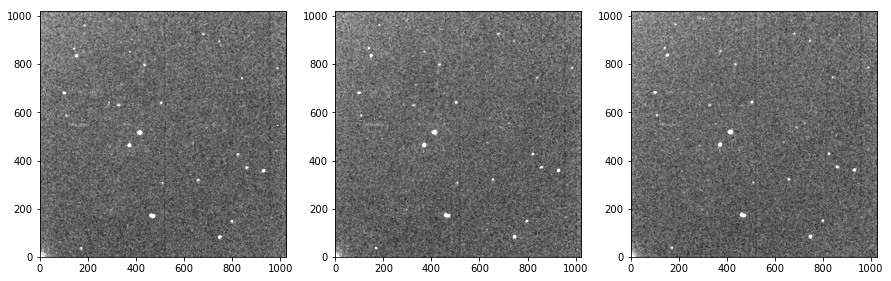

In [240]:
plt.figure(figsize=((15,15)))
plt.subplot(131)
plt.imshow(filt[0], cmap='gray', origin='lower', vmin=np.median(filt[0])-2*np.std(filt[0]),
                    vmax=np.median(filt[0])+3*np.std(filt[0]))
plt.subplot(132)
plt.imshow(filt[1], cmap='gray', origin='lower', vmin=np.median(filt[1])-2*np.std(filt[1]),
                    vmax=np.median(filt[1])+3*np.std(filt[1]))
plt.subplot(133)
plt.imshow(filt[2], cmap='gray', origin='lower', vmin=np.median(filt[2])-2*np.std(filt[2]),
                    vmax=np.median(filt[2])+3*np.std(filt[2]))
plt.show()

In [241]:
mask = np.zeros_like(filt)
median=np.ndarray(len(filt))
std=np.ndarray(len(filt))

for i in range(len(filt)):
    median[i] = np.median(filt[i])
    std[i] = np.std(filt[i])

for k in range(len(filt)):
    for i in range(1024):
        for j in range(1024):
            if filt[k][i][j] > median[k]+5*std[k]:
                mask[k][i][j] = 1

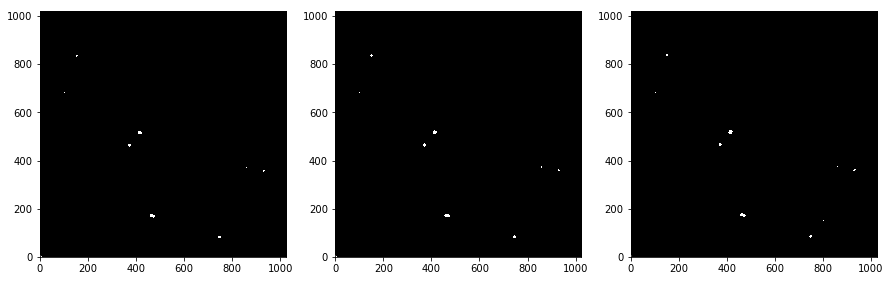

In [242]:
plt.figure(figsize=((15,15)))
plt.subplot(131)
plt.imshow(mask[0], origin='lower', cmap='gray')
plt.subplot(132)
plt.imshow(mask[1], origin='lower', cmap='gray')
plt.subplot(133)
plt.imshow(mask[2], origin='lower', cmap='gray')
plt.show()

In [243]:
star = [0,0,0]
max_pos = np.ndarray((len(filt),2))

for i in range(len(filt)):
    labels,num = snd.label(mask[i] == 1, np.ones((3,3)))
    centers = snd.center_of_mass(mask[i],labels,range(1,num+1))
    max_pos[i] = snd.maximum_position(filt[i],labels)
    star[i] = centers

x = np.array(star)[:,:,0]
y = np.array(star)[:,:,1]

plt.figure(figsize=((15,15)))
plt.subplot(131)
plt.plot(y[0],x[0],'bs', markersize=10, mfc='none')
plt.imshow(reduced[0], cmap='gray', origin='lower', vmin=np.median(reduced[0])-2*np.std(reduced[0]),
                    vmax=np.median(reduced[0])+3*np.std(reduced[0]))
plt.subplot(132)
plt.plot(y[1],x[1],'bs', markersize=10, mfc='none')
plt.imshow(reduced[1], cmap='gray', origin='lower', vmin=np.median(reduced[1])-2*np.std(reduced[1]),
                    vmax=np.median(reduced[1])+3*np.std(reduced[1]))
plt.subplot(133)
plt.plot(y[2],x[2],'bs', markersize=10, mfc='none')
plt.imshow(reduced[2], cmap='gray', origin='lower', vmin=np.median(reduced[2])-2*np.std(reduced[2]),
                    vmax=np.median(reduced[2])+3*np.std(reduced[2]))
plt.show()

In [244]:
r = [5,8,11,14,17,20,30]

flux = np.empty((len(filt),len(r)))

reduced_copy = np.copy(reduced)

for l in range(len(filt)):
    for k in range(len(r)):
        for i in range(1024):
            for j in range(1024):
                if ((i-max_pos[l][0])**2+(j-max_pos[l][1])**2) < (r[k]**2):
                    #reduced_copy[0][i][j] = 0
                    flux[l][k] = flux[l][k] + reduced[l][i][j]


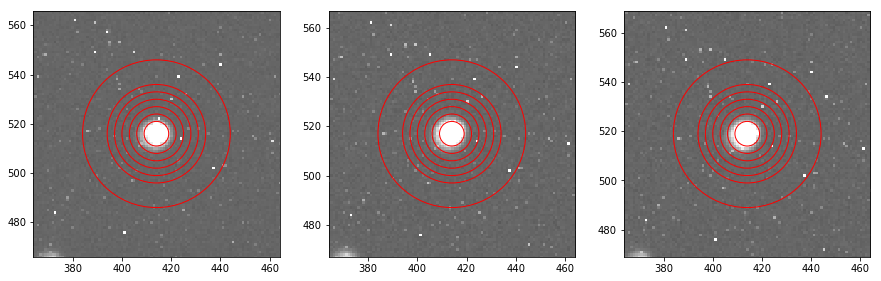

In [245]:
plt.figure(figsize=((15,15)))

#Frame 1
plt.subplot(131)

circle1=plt.Circle((max_pos[0][1],max_pos[0][0]),r[0],color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
circle2=plt.Circle((max_pos[0][1],max_pos[0][0]),r[1],color='r',fill=False)
plt.gcf().gca().add_artist(circle2)
circle3=plt.Circle((max_pos[0][1],max_pos[0][0]),r[2],color='r',fill=False)
plt.gcf().gca().add_artist(circle3)
circle4=plt.Circle((max_pos[0][1],max_pos[0][0]),r[3],color='r',fill=False)
plt.gcf().gca().add_artist(circle4)
circle5=plt.Circle((max_pos[0][1],max_pos[0][0]),r[4],color='r',fill=False)
plt.gcf().gca().add_artist(circle5)
circle6=plt.Circle((max_pos[0][1],max_pos[0][0]),r[5],color='r',fill=False)
plt.gcf().gca().add_artist(circle6)
circle7=plt.Circle((max_pos[0][1],max_pos[0][0]),r[6],color='r',fill=False)
plt.gcf().gca().add_artist(circle7)

plt.imshow(reduced[0], cmap='gray', origin='lower', vmin=np.median(reduced[0])-2*np.std(reduced[0]),
                    vmax=np.median(reduced[0])+3*np.std(reduced[0]))

plt.xlim(max_pos[0][1]-50,max_pos[0][1]+50)
plt.ylim(max_pos[0][0]-50,max_pos[0][0]+50)


#Frame 2
plt.subplot(132)

circle1=plt.Circle((max_pos[1][1],max_pos[1][0]),r[0],color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
circle2=plt.Circle((max_pos[1][1],max_pos[1][0]),r[1],color='r',fill=False)
plt.gcf().gca().add_artist(circle2)
circle3=plt.Circle((max_pos[1][1],max_pos[1][0]),r[2],color='r',fill=False)
plt.gcf().gca().add_artist(circle3)
circle4=plt.Circle((max_pos[1][1],max_pos[1][0]),r[3],color='r',fill=False)
plt.gcf().gca().add_artist(circle4)
circle5=plt.Circle((max_pos[1][1],max_pos[1][0]),r[4],color='r',fill=False)
plt.gcf().gca().add_artist(circle5)
circle6=plt.Circle((max_pos[1][1],max_pos[1][0]),r[5],color='r',fill=False)
plt.gcf().gca().add_artist(circle6)
circle7=plt.Circle((max_pos[1][1],max_pos[1][0]),r[6],color='r',fill=False)
plt.gcf().gca().add_artist(circle7)

plt.imshow(reduced[1], cmap='gray', origin='lower', vmin=np.median(reduced[1])-2*np.std(reduced[1]),
                    vmax=np.median(reduced[1])+3*np.std(reduced[1]))

plt.xlim(max_pos[1][1]-50,max_pos[1][1]+50)
plt.ylim(max_pos[1][0]-50,max_pos[1][0]+50)

#Frame 3
plt.subplot(133)

circle1=plt.Circle((max_pos[2][1],max_pos[2][0]),r[0],color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
circle2=plt.Circle((max_pos[2][1],max_pos[2][0]),r[1],color='r',fill=False)
plt.gcf().gca().add_artist(circle2)
circle3=plt.Circle((max_pos[2][1],max_pos[2][0]),r[2],color='r',fill=False)
plt.gcf().gca().add_artist(circle3)
circle4=plt.Circle((max_pos[2][1],max_pos[2][0]),r[3],color='r',fill=False)
plt.gcf().gca().add_artist(circle4)
circle5=plt.Circle((max_pos[2][1],max_pos[2][0]),r[4],color='r',fill=False)
plt.gcf().gca().add_artist(circle5)
circle6=plt.Circle((max_pos[2][1],max_pos[2][0]),r[5],color='r',fill=False)
plt.gcf().gca().add_artist(circle6)
circle7=plt.Circle((max_pos[2][1],max_pos[2][0]),r[6],color='r',fill=False)
plt.gcf().gca().add_artist(circle7)

plt.imshow(reduced[2], cmap='gray', origin='lower', vmin=np.median(reduced[2])-2*np.std(reduced[2]),
                    vmax=np.median(reduced[2])+3*np.std(reduced[2]))

plt.xlim(max_pos[2][1]-50,max_pos[2][1]+50)
plt.ylim(max_pos[2][0]-50,max_pos[2][0]+50)

plt.show()

In [246]:
print flux

[[  57589.31383361   86536.00636232  102677.29952212  118874.33732635
   137851.00153578  161986.50166499  270629.00179633]
 [  54671.37679632   84645.52191664  101543.58471519  117729.51346999
   136836.74813209  160765.46203987  267363.70312708]
 [  55195.59714082   84029.54150233  100178.10573258  118378.76266626
   136840.06062035  160008.76617354  265601.21445447]]


In [247]:
F66 = np.ndarray((len(flux),len(r)))

for i in range(len(flux)):
    for j in range(len(r)):
        F66[i][j] = flux[i][j]-((flux[i][len(r)-1]-flux[i][len(r)-2])/(np.pi*(r[len(r)-1]**2-r[len(r)-2]**2))*(np.pi*(r[j]**2)))

print F66

[[ 52157.18882705  72629.76634551  76385.81449033  76286.47727487
   75055.63645987  75072.50155991  75072.50155991]
 [ 49341.46474196  71000.94705747  75746.81037209  75943.0029638
   75222.96478368  75486.8691701   75486.8691701 ]
 [ 49915.97472677  70513.70812237  74624.7332486   76986.52294014
   75807.62551397  75534.8075488   75534.8075488 ]]


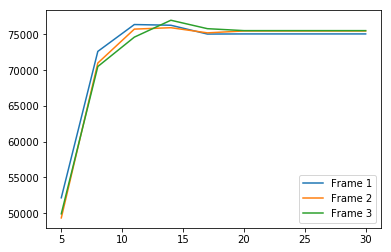

In [248]:
for i in range(len(flux)):
    plt.plot(r,F66[i], label='Frame %d' % (i+1))
    
plt.legend()
plt.show()

In [249]:
ext_coef = {'B':0.302,'R':0.104,'I':0.051,'V':0.164,'Ha':0.104}
F66_mag = {'B':10.26,'R':10.642,'I':10.809,'V':10.59,'Ha':11.024}

In [250]:
airmass = np.mean([fits.getheader(image)['AIRMASS'] for image in file_names])
airmass

1.0288703063100033

In [253]:
#CHANGE THIS VALUE TO MATCH RING WHERE FLUX PEAKS              XX
zpt[filt_name] = F66_mag[filt_name]+2.5*np.log10(np.mean(F66[:,2]))-ext_coef[filt_name]*airmass
zpt[filt_name]

23.113097822595154

In [252]:
zpt

{'B': 23.124994603051221,
 'Ha': 23.113097822595154,
 'I': 22.356577377061228,
 'R': 23.33478622409541,
 'V': 23.564816238288746}

In [202]:
#zpt = {'B':0,'R':0,'I':0,'V':0,'Ha':0}